<div align='center'  style="color:darkblue;font-size:2.2em; font-family:Segoe UI"><b>Data Science and Business Analytics Internship Task</b></div>
<br><br>

### Task : Prediction using Decision Tree Algorithm

<div align="right" style="color:blue;font-size:1.3em;font-family:cursive">Submitted by: <i>Omkar Dhekane</i></div>
<div align="right" style="color:blue"><i>Batch: JULY'21</i></div>



**Aim:** Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
<br><br>
**Dataset:** https://bit.ly/3kXTdox

#### Before implementing the Decision Tree Classifier, lets first import the required libraries and understand the given dataset !


## <div align="center"><b>#Step 1: Import the required Python Packages</b></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus # conda install pydotplus

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from six import StringIO
from IPython.display import Image


Here **Numpy** is a package in Python which is extensively used for scientific computing.<br><br>**Pandas** is an open source Python package that is most widely used for data science/data analysis and machine learning tasks.<br><br>Here i have imported **Seaborn** as it is a data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python.<br><br>
Moreover, i also have imported **Scikit-learn** which is a free machine learning library for Python. It features various algorithms like SVM, random forests, and k-neighbours etc.

## <div align="center"><b>#Step 2: Building Dataframe and Data Extraction</b></div>

In [2]:
# lets load the dataset
df = pd.read_csv('./Iris.csv')

if bool(df.empty) == False:
    print("Dataset loaded successfully!")
df.head()


Dataset loaded successfully!


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop('Id',axis = 1)
print("Original Shape of dataset: " + str(df.shape) + "\n")
print(str(df.info()) + "\n")
print("Basic Statistics of dataset : \n")
print(df.describe())

Original Shape of dataset: (150, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Basic Statistics of dataset : 

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6

Here, i have dropped the 'Id' column from our dataset as it is not required here. For our decision tree classifier, lets assign the the id to each type of species so that each species acts as a different class in our model.

In [4]:
X = df.iloc[:,[0,1,2,3]].values
y = df.iloc[:,[4]].values

m,n = df.shape[0],df.shape[1]-1

#assigning id's to our output
yn = []
classes = np.unique(y)
for i in range(y.shape[0]):
    if y[i] in list(classes):
        yn.append(list(classes).index(y[i]))
y = np.asarray(yn) 

features = df.columns.tolist()
features.pop()

print("\nTotal Number of Training Examples (m): " + str(m))
print("\nTotal Number of Features (n): " + str(n))
print("\nFeatures: " + str(features))
print("\nclasses to predict: " + str(classes))
print("\nFor first 5 examples:\n\nX =" + str(X[0:5]))
print("\ny = " + str(y[0:5]))


Total Number of Training Examples (m): 150

Total Number of Features (n): 4

Features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

classes to predict: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

For first 5 examples:

X =[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

y = [0 0 0 0 0]


## <div align="center"><b>#Step 3: Model Selection</b></div>

Now that we have extracted the data attributes and corresponding labels,let's split them to train and test datasets from the variable X and y. Here, 0.25 show that 25% of the dataset will be used as test data and remaining will be used as train data

In [5]:
# model selection 
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size = 0.25, random_state = 50)

print("Size of x_train : " + str(x_train.shape))
print("Size of x_test : " + str(x_test.shape))
print("Size of y_train : " + str(y_train.shape))
print("Size of y_test : " + str(y_test.shape))

Size of x_train : (112, 4)
Size of x_test : (38, 4)
Size of y_train : (112,)
Size of y_test : (38,)


## <div align="center"><b>#Step 4: Create the Model in Python (Decision Tree Classifier)</b></div>

Let use the decision tree classifier algorithm imported from our scikit-learn library!

In [6]:
clf = DecisionTreeClassifier() #default gini
clf.fit(x_train,y_train)
print('Decision Tree Classifer Created!')

Decision Tree Classifer Created!


## <div align="center"><b>#Step 5: Predict using Test Dataset and Check the score</b></div>

In [7]:
y_prediction = clf.predict(x_test) 

print("Accuracy of Score on training data: " + str(accuracy_score(y_true = y_train,y_pred = clf.predict(x_train))) + " (100%)")
print("Accuracy of Score on testing data: " + str(accuracy_score(y_true = y_test,y_pred = clf.predict(x_test)))+ " (94.7%)")

Accuracy of Score on training data: 1.0 (100%)
Accuracy of Score on testing data: 0.9473684210526315 (94.7%)


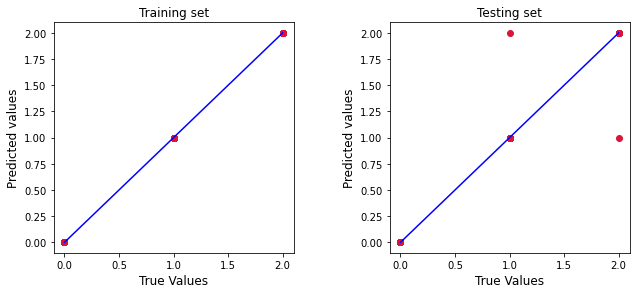

In [8]:
true_value = y_train
predicted_value = clf.predict(x_train)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(true_value, predicted_value, c='crimson')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted values', fontsize=12)
plt.title("Training set")


#----------------------------------
true_value = y_test
predicted_value = clf.predict(x_test)

plt.subplot(1,2,2)
plt.scatter(true_value, predicted_value, c='crimson')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted values', fontsize=12)
plt.title("Testing set")


plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)
plt.show()

Here, we can check the accuracy of testing data by experimenting/tuning the parameters of decision tree. lets try the **min_samples_split** to 50 and see how our accuracy changes.

In [9]:
clf2 = DecisionTreeClassifier(criterion = 'entropy',min_samples_split = 40)
clf2.fit(x_train,y_train)
print(clf2)
print('Decision Tree Classifer Created!')
y_prediction = clf2.predict(x_test)

print("Accuracy of Score on training data: " + str(accuracy_score(y_true = y_train,y_pred = clf2.predict(x_train))) + " (96.4%)")
print("Accuracy of Score on testing data: " + str(accuracy_score(y_true = y_test,y_pred = clf2.predict(x_test)))+ " (94.7%)")


DecisionTreeClassifier(criterion='entropy', min_samples_split=40)
Decision Tree Classifer Created!
Accuracy of Score on training data: 0.9642857142857143 (96.4%)
Accuracy of Score on testing data: 0.9473684210526315 (94.7%)


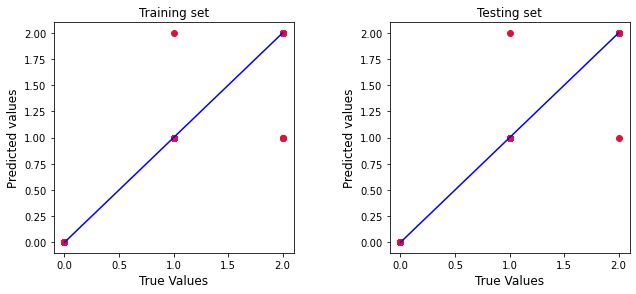

In [10]:
true_value = y_train
predicted_value = clf2.predict(x_train)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(true_value, predicted_value, c='crimson')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted values', fontsize=12)
plt.title("Training set")


#----------------------------------
true_value = y_test
predicted_value = clf2.predict(x_test)

plt.subplot(1,2,2)
plt.scatter(true_value, predicted_value, c='crimson')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted values', fontsize=12)
plt.title("Testing set")
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)
plt.show()

In [11]:
print("Confusion Matrix:\n" + str(confusion_matrix(true_value,predicted_value)))
print("\nClassification Report:\n" + classification_report(true_value,predicted_value))

Confusion Matrix:
[[11  0  0]
 [ 0 14  1]
 [ 0  1 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        15
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



## <div align="center"><b>#Step 6: Visualize the Decision Tree</b></div>

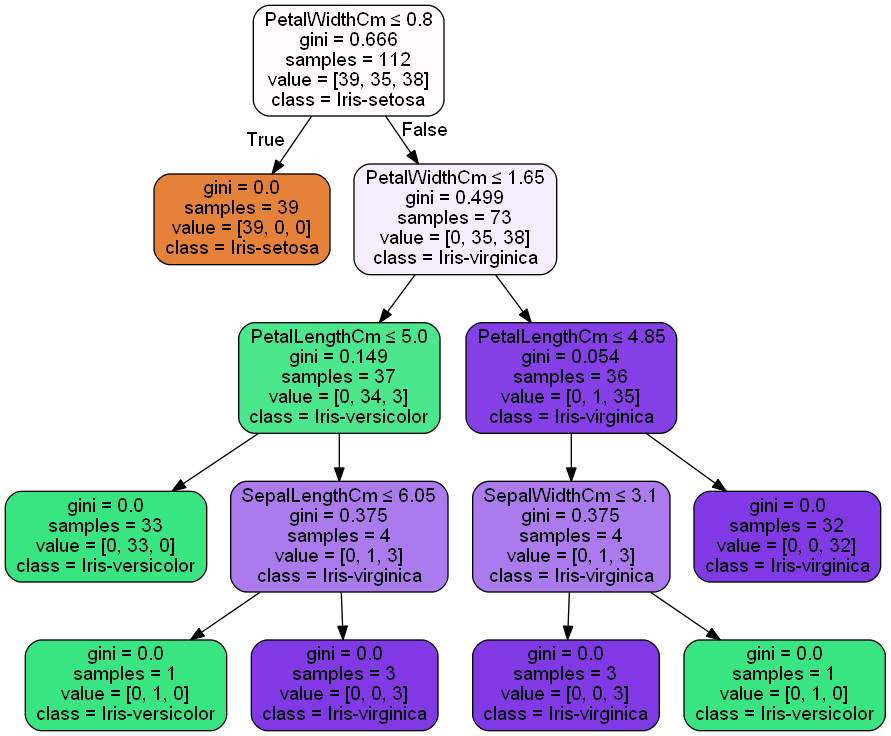

In [12]:
dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=features,
    class_names = classes
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


## <div align="center"><b>#Step 7: Prediction with a New Set of Data</b></div>

In [13]:
print("Test Cases: ")
#Test case 1 ->
x_inp = [[2.7,3.2,1.3,0.2]]
y_pred = clf.predict(x_inp)
print("\nTest case 1: " + classes[y_pred][0] + " (predicted output)")

#Test case 2 -> 
x_inp = [[6.2,3.1,4.3,1.4]]
y_pred = clf.predict(x_inp)
print("\nTest case 2: " + classes[y_pred][0] + " (predicted output)")

#Test case 3 -> 
x_inp = [[5.7,2.6,5.3,2.2]]
y_pred = clf.predict(x_inp)
print("\nTest case 3: " + classes[y_pred][0] + " (predicted output)")


Test Cases: 

Test case 1: Iris-setosa (predicted output)

Test case 2: Iris-versicolor (predicted output)

Test case 3: Iris-virginica (predicted output)


<br><br>
<div align='center' style="color:green;font-size:2.2em; font-family:cursive">
    <b>Thank You for Watching! 😃😃 </b>
</div>
<br><br>